In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
nrow(df)
head(df,2)

[1] 8352

,ABHD10_.3_111697439_T_G,ABHD12B_.14_51328222_C_T,ACKR2_.3_42817129_C_T,ADD2_.2_70894426_A_T,ADSL_.22_40757228_A_C,AIM1L_.1_26673825_C_T,AKAP7_.6_131691964_C_A,ALDH7A1_.5_126011412_G_A,ANKRD18B_.9_33524775_C_A,APIP_.11_34905987_T_C,...,YWHAE_.17_1246420_G_A,ZBBX_.3_167080934_T_G,ZC3HAV1_.7_138730361_T_C,ZFR2_.19_3840157_C_T,ZG16B_.16_2871121_T_C,ZNF423_.16_49599995_C_G,ZNF552_.19_58315273_G_A,ZNF738_.19_21474173_G_A,ZNF77_.19_2936535_G_A,ZP3_.7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.2235163,-0.03575032,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.1120253,-0.04172133,0.01126897,0.1057579,-0.03101814,0.0909417,0.3020245,-0.1583842,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.1921801,-0.01471768,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.3759854,0.08774666,0.02505916,-0.1950055,-0.22780547,0.0775938,0.3452492,-0.3472152,-0.15259400


In [4]:
colnames(df) = gsub("\\.","-",colnames(df))

In [5]:
df$condition = ''
df[grep("d30",rownames(df)),]$condition = 'day30'
df[grep("d52_un",rownames(df)),]$condition = 'day52'
df[grep("d52_tr",rownames(df)),]$condition = 'day52_rot'

In [6]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_labels.csv"
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_summaries.csv"
df_clusters = read.csv(filename, row.names = 1)
head(df_clusters,2)

,label,gene,pp0,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11
0,4,ABHD10_-3_111697439_T_G,0,0,0,0,1,0,0,0,0,0,0,0
1,5,ABHD12B_-14_51328222_C_T,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
col_day30 = canva_pal("Cheerful brights")(4)[1]
col_day52 = canva_pal("Cheerful brights")(4)[3]
col_day52_rot = canva_pal("Cheerful brights")(4)[2]

In [8]:
col_day30
col_day52
col_day52_rot 

[1] "#258039"

[1] "#31a9b8"

[1] "#f5be41"

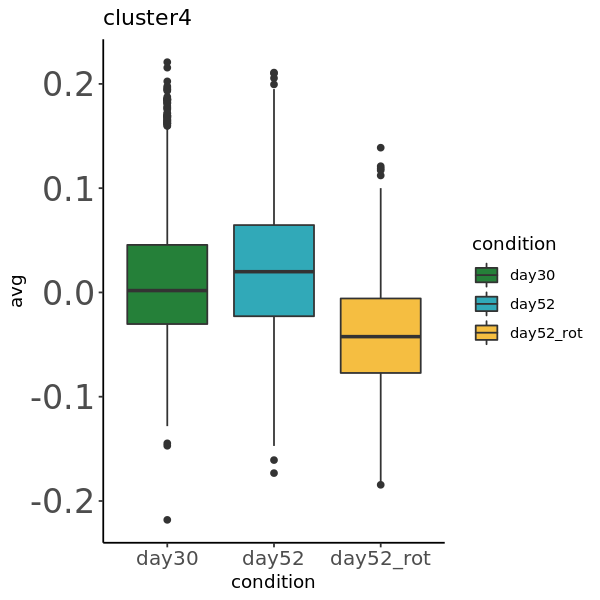

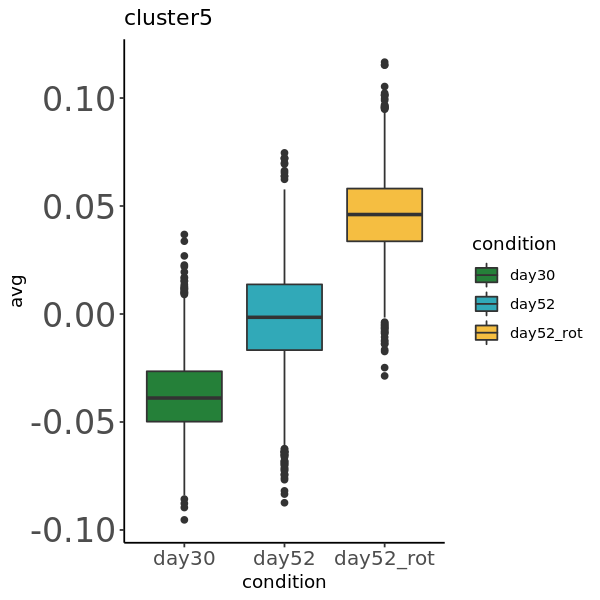

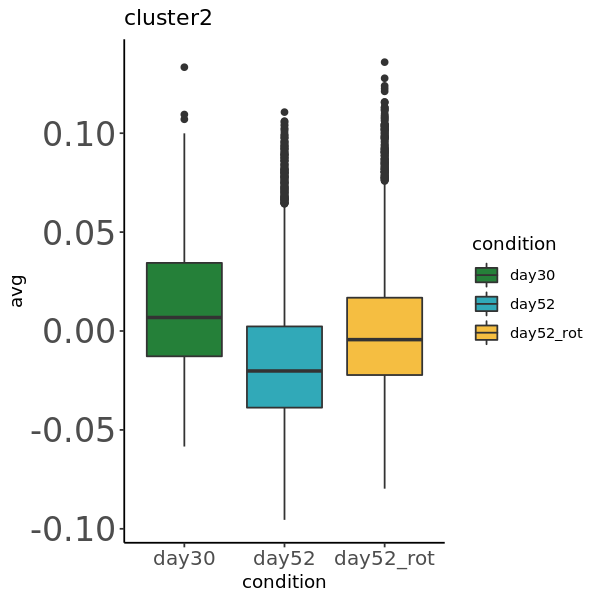

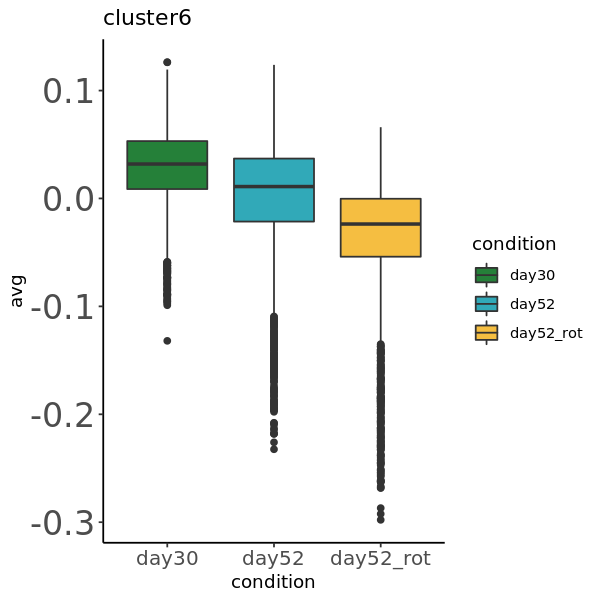

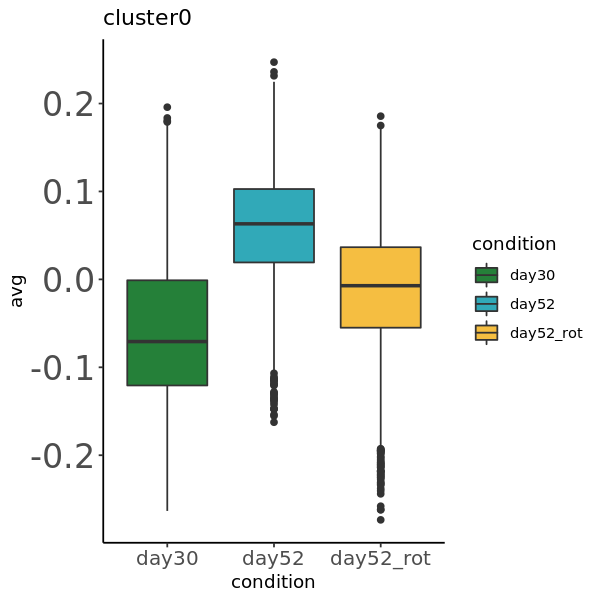

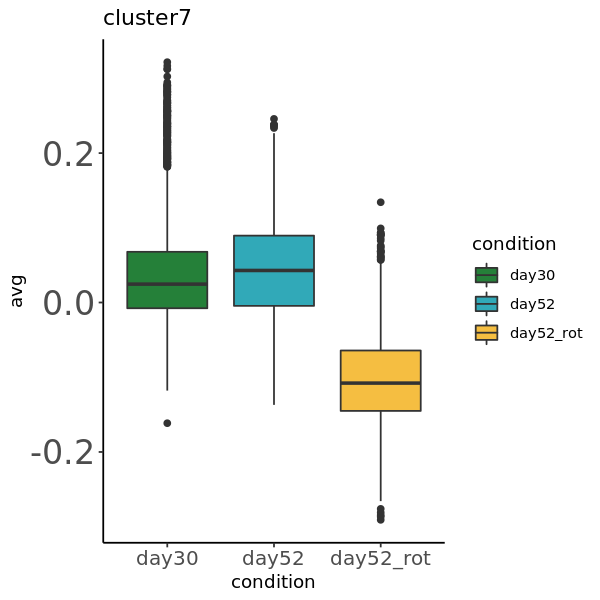

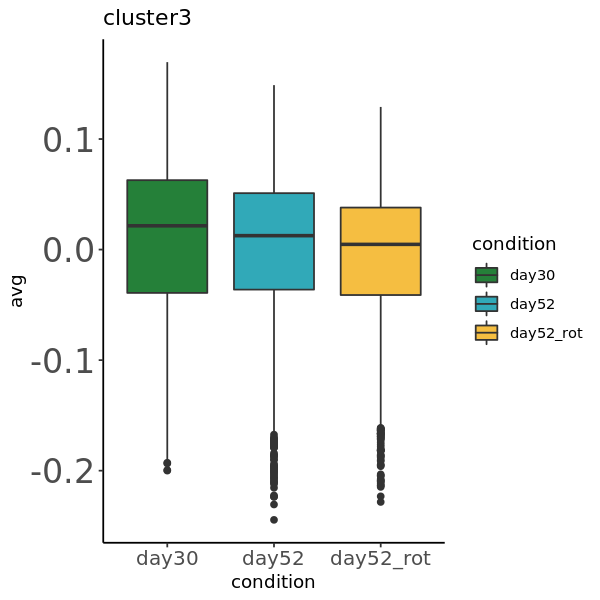

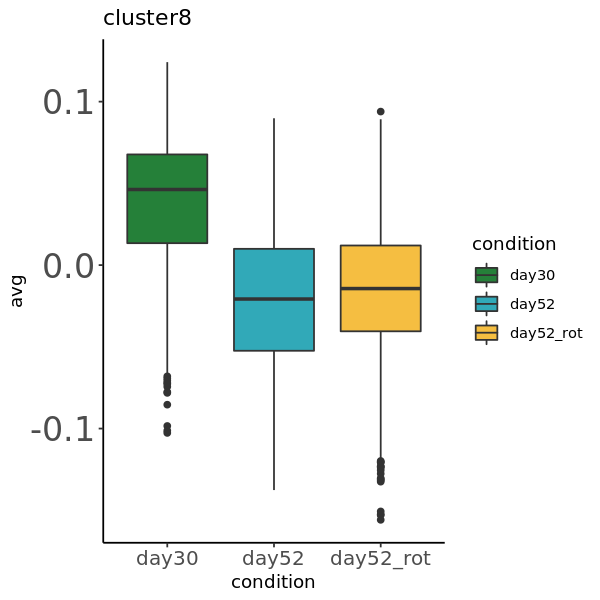

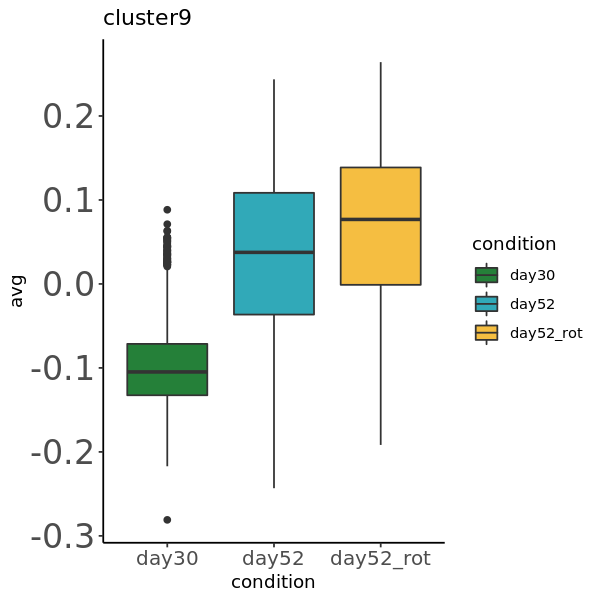

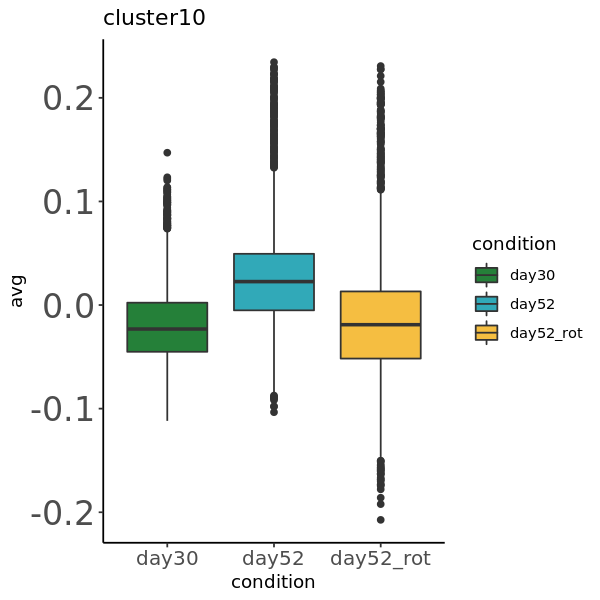

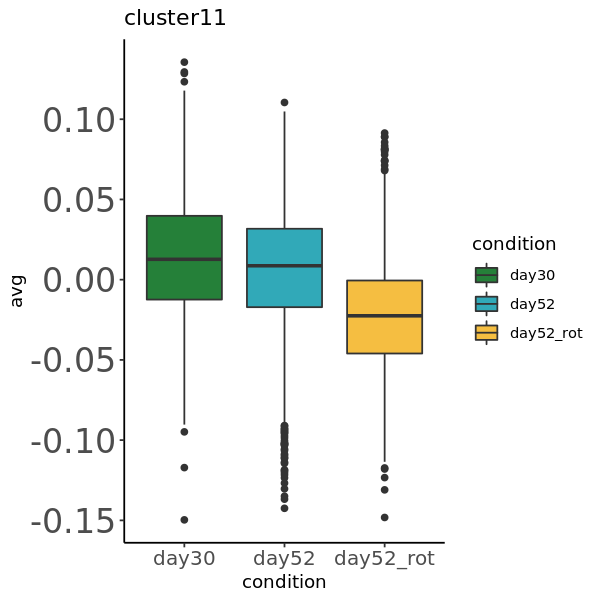

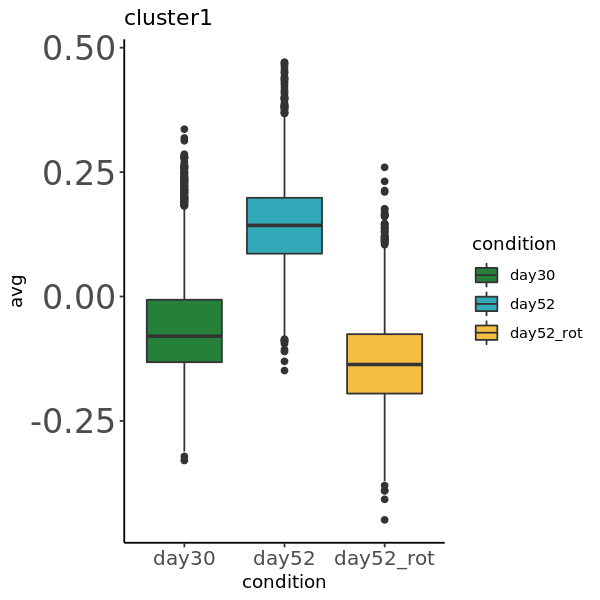

In [11]:
options(repr.plot.width = 5, repr.plot.height = 5)
clusters = unique(df_clusters$label)
for (cluster in clusters){
#     print(cluster)
    genes = unique(df_clusters[df_clusters$label == cluster,"gene"])
#     print(c(cluster, length(genes)))
    df0 = df[,genes]
    df0$avg = rowMeans(df0)
    df0$condition = df$condition
    p = ggplot(df0, aes(x=condition, y=avg, fill=condition)) + geom_boxplot() + theme_classic()
    p = p + scale_fill_manual(values = c(col_day30,col_day52,col_day52_rot)) 
    p = p + theme(axis.text.x = element_text(size = 12),axis.text.y = element_text(size = 20))
    print(p + ggtitle(paste0("cluster",cluster)))
    
}